Because [the data](https://divvy-tripdata.s3.amazonaws.com/index.html) is provided for each month of the year, I've decided to union / concatenate all seven spreadsheets of 2022 so far (January - July) into one big CSV file. I've also made an .xlsx spreadsheet for a month-on-month analysis but otherwise I will use the file exported from this notebook.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import os

In [10]:
dirname = 'data'

## Union / Concatenation

In [11]:
df = pd.DataFrame()
length = 0

for filename in os.listdir(dirname):
    if filename[-3:] == "csv":
        temp = pd.read_csv(f"{dirname}/{filename}")
        df = pd.concat([df, temp])
        length += temp.shape[0]

<AxesSubplot:>

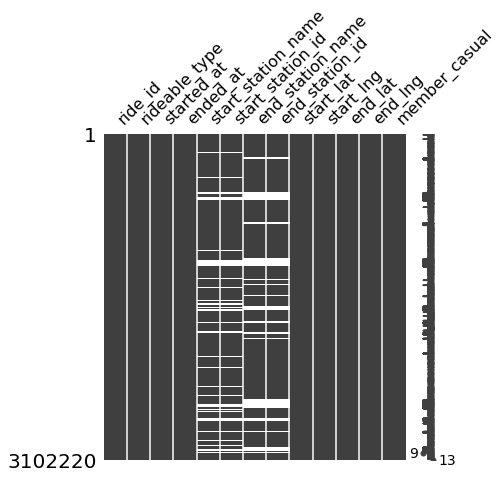

In [12]:
msno.matrix(df, figsize=(6,6))

In [13]:
print(df.columns)
print(df.shape, length)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
(3102220, 13) 3102220


In [14]:
dates = pd.DatetimeIndex(df['started_at'])
print(dates.min(),dates.max())

2022-01-01 00:00:05 2022-07-31 23:59:58


## Export

In [15]:
df.to_csv('2022-yearly-divvy-tripdata.csv')

## EDA

In [16]:
df = pd.read_csv('2022-divvy-tripdata.csv')
df.describe(include='all')

FileNotFoundError: [Errno 2] No such file or directory: '2022-divvy-tripdata.csv'

In [ ]:
disc_cols = ['ride_id', 'rideable_type', 'started_at', 
                 'ended_at', 'start_station_name', 'start_station_id', 
                 'end_station_name', 'end_station_id']
cont_cols = set(df.columns).difference(disc_cols)

In [ ]:
start = set(df['start_station_name'])
end = set(df['end_station_name'])

diff_stations = list( start.difference(end) )
temp = df.loc[df['start_station_name'].isin(diff_stations),:]